# IMDB Sentiment Analysis
# Nakshatra Gupta 
# 2105469

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import nltk




# Load data from CSV
df = pd.read_csv("IMDB_Dataset.csv")

import matplotlib.pyplot as plt ## fpr plotting roc curve and confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report #for making confusion matrix

/home/nakshatra/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
df.isnull().sum() # checking for null values

review       0
sentiment    0
dtype: int64

In [4]:
# Data preprocessing
stop_words = set(stopwords.words('english'))

In [7]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization and lowercasing
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return ' '.join(tokens)

In [8]:
df['review'] = df['review'].apply(preprocess_text)

In [8]:
# Splitting the data into features (reviews) and labels (sentiments)
X = df['review']
y = df['sentiment']

In [9]:
# Feature extraction (TF-IDF)
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [11]:
# Model training (Naive Bayes classifier)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [12]:
# Model evaluation
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8664


In [13]:
# Create empty lists to store the sentences and predicted sentiments
sentences = []
predicted_sentiments = []

# Populate the lists with sentences and predicted sentiments
for sentence, sentiment in zip(X_test, y_pred):
    predicted_sentiment = "Positive" if sentiment == 'positive' else "Negative"
    sentences.append(sentence)
    predicted_sentiments.append(predicted_sentiment)

# Create a DataFrame from the lists
sentiment_df = pd.DataFrame({'Sentence': sentences, 'Predicted Sentiment': predicted_sentiments})

# Print the DataFrame
sentiment_df


,Sentence,Predicted Sentiment
0,"(0, 40073)\t0.12371161686519405\n (0, 11024...",Positive
1,"(0, 47057)\t0.13135799641670204\n (0, 29007...",Positive
2,"(0, 71402)\t0.19150983961002999\n (0, 17410...",Negative
3,"(0, 65651)\t0.215529350869118\n (0, 5020)\t...",Positive
4,"(0, 20573)\t0.11718052492861743\n (0, 85595...",Negative
...,...,...
9995,"(0, 52277)\t0.12830319183240835\n (0, 44626...",Negative
9996,"(0, 73444)\t0.33288826392924337\n (0, 15307...",Positive
9997,"(0, 19058)\t0.18299240665254998\n (0, 23860...",Positive
9998,"(0, 55523)\t0.19620785009187358\n (0, 45103...",Negative


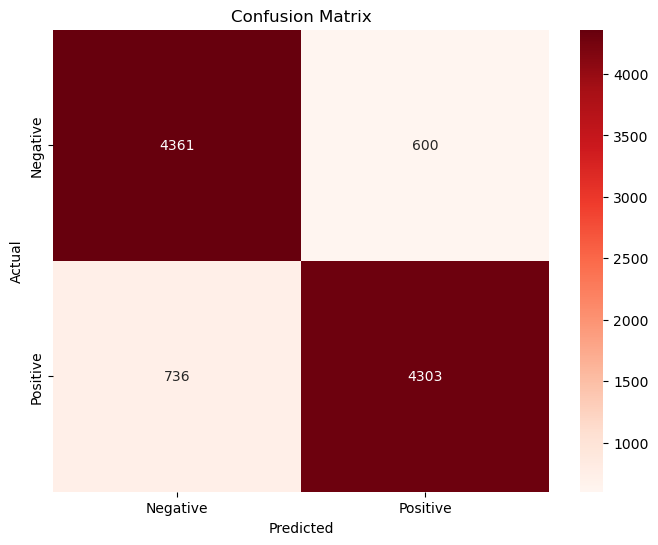

In [14]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

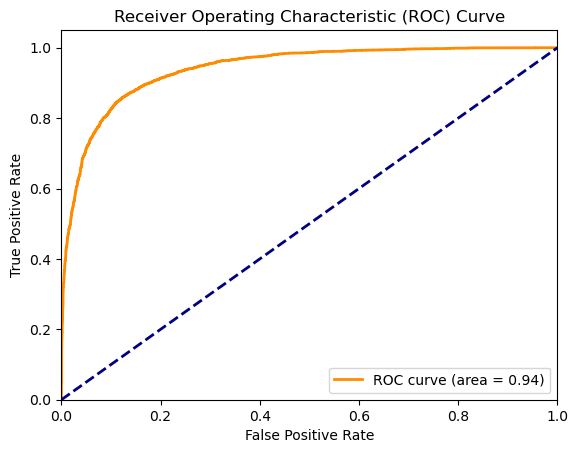

In [15]:
# Predict probabilities
y_prob = nb_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for positive class
fpr, tpr, _ = roc_curve(y_test == 'positive', y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()